In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading the dataset

In [2]:

credit_card_df =pd.read_csv("creditcard.csv")

In [3]:
#checking the first five rows of the dataset
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#checking the last five rows of the dataset
credit_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking the number of rows and columns
credit_card_df.shape

(284807, 31)

In [7]:
#checking the information of the dataset
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking for null/missing values
credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#dropping time column
credit_card_df =credit_card_df.drop(["Time"], axis =1)

In [10]:
#checking for duplicated values
credit_card_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [11]:
credit_card_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
credit_card_df.groupby("Class").mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


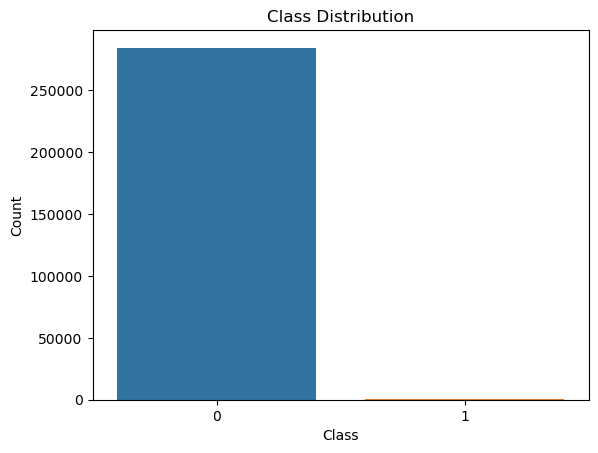

In [13]:
#checking the distribution 
sns.countplot(data=credit_card_df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


### Based on the analysis of the visualisation, it is evident that the dataset is imbalanced. we will address the issue of imbalanced dataset by implementing the oversampling and undersampling techniques.

### Dealing with imbalanced dataset using the undersampling method

In [14]:
#assigning the class unique values to a variable
legit=credit_card_df[credit_card_df["Class"]==0]
fraud=credit_card_df[credit_card_df["Class"]==1]

In [15]:
legit.shape

(284315, 30)

In [16]:
fraud.shape

(492, 30)

In [17]:
 legit_sample = legit.sample(n=492)

In [18]:
legit_sample.shape

(492, 30)

In [19]:
credit_card_newdf=pd.concat([legit_sample,fraud], ignore_index=True)

In [20]:
credit_card_newdf["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
credit_card_newdf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.345070,0.445285,0.112122,-2.103032,1.019596,-0.118096,0.715370,-0.095913,-2.001730,-0.306176,...,0.181895,0.342401,-0.628239,-1.412265,1.145087,-0.033654,-0.076274,-0.048331,34.95,0
1,0.034439,0.980184,-1.243064,-0.349909,1.142092,0.578680,0.267219,0.696728,-0.472998,-1.152354,...,0.448711,1.388309,-0.046948,-1.413254,-0.477961,-0.054662,-0.016637,-0.067837,13.00,0
2,-4.214582,2.395879,-0.600196,-2.425047,1.993984,5.698067,-4.135542,-10.398561,1.730811,0.674597,...,10.569625,-3.377947,0.978754,0.930299,0.101910,1.039669,0.217969,-0.224318,1.00,0
3,1.699514,-0.800349,-0.608646,0.270992,0.093692,1.431693,-0.919691,0.422854,2.176877,-0.288068,...,0.174694,0.732779,0.114535,-1.653269,-0.560037,0.602429,-0.029339,-0.064803,102.00,0
4,-0.179816,0.821671,0.641583,-0.943874,0.735403,-1.077077,1.163646,-0.276521,-0.384406,-0.894884,...,-0.217580,-0.571072,-0.051121,0.009292,-0.125816,0.091845,-0.033935,0.015612,1.98,0


### Training models using the under sampled dataset

In [22]:
X=credit_card_newdf.drop("Class", axis = 1)
y=credit_card_newdf["Class"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=42)

### LogisticRegression model

In [24]:
logreg = LogisticRegression()

In [25]:
logreg.fit(X_train, y_train)

c:\Users\Orebi\OneDrive\ana\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
pred1 =logreg.predict(X_test)

In [27]:
 acc =accuracy_score(y_test, pred1)
print("Accuracy score:{}".format(acc*100))

Accuracy score:92.89340101522842


In [28]:
print("classification report : \n", classification_report(y_test, pred1))

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



### DecisionTreeClassifier model

In [29]:
DTC =DecisionTreeClassifier()

In [30]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
pred2 =DTC.predict(X_test)

In [32]:
 Acc = accuracy_score(y_test, pred2)
print("The Accuracy score of the decisiontreeclassifier is {} ".format(acc*100))

The Accuracy score of the decisiontreeclassifier is 92.89340101522842 


In [33]:
precision_score(y_test, pred2)*100

93.6842105263158

In [34]:
recall_score(y_test,pred2)*100

90.81632653061224

In [35]:
f1_score(y_test,pred2)

0.922279792746114

### RandomForestClassifier model

In [36]:
RFC = RandomForestClassifier()

In [37]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
pred3 = RFC.predict(X_test)

In [39]:
accuracy_score(y_test, pred3)

0.9441624365482234

In [40]:
precision_score(y_test, pred3)

0.978021978021978

In [41]:
recall_score(y_test, pred3)

0.9081632653061225

In [42]:
f1_score(y_test, pred3)

0.9417989417989417

### Dealing with imbalanced dataset using oversampling method

In [43]:
X=credit_card_df.drop("Class", axis = 1)
y=credit_card_df["Class"]

In [44]:
X.shape

(284807, 29)

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
X_rsp, y_rsp=SMOTE().fit_resample(X,y)

In [47]:
y_rsp.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_rsp,y_rsp, test_size= 0.20,random_state=42)

### Building model using oversampled dataset

In [49]:
logreg =LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Orebi\OneDrive\ana\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
pred =logreg.predict(X_test)

In [51]:
accuracy_score(y_test,pred)

0.9584263932609958

In [52]:
DTC= DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
pred2=DTC.predict(X_test)

In [54]:
accuracy_score(y_test,pred2)

0.998197421873626

In [43]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
pred3 = RFC.predict(X_test)

In [45]:
accuracy_score(y_test,pred3)

0.9390862944162437

In [46]:
recall_score(y_test, pred3)

0.8877551020408163

In [47]:
f1_score(y_test, pred3)

0.935483870967742

In [48]:
precision_score(y_test,pred3)

0.9886363636363636